In [3]:
import os
import cv2
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cpu')

In [4]:
print(f"CWD is: {os.getcwd()}")

CWD is: c:\Users\mewri\OneDrive\Documents\ENEE408N\NaviGatr\src\obj_detect


In [5]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

In [6]:
from nanodet.util import cfg, load_config, Logger

In [7]:
config_path  = r'C:\Users\mewri\OneDrive\Documents\ENEE408N\NaviGatr\nanodet\config\nanodet-plus-m_416.yml'
model_path = r'C:\Users\mewri\OneDrive\Documents\ENEE408N\NaviGatr\nanodet/nanodet-plus-m_416.pth'
image_path = r"C:\Users\mewri\OneDrive\Documents\ENEE408N\COCO_train2014_000000196639.jpg"

In [8]:
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

In [18]:
print("Model Input Size:", cfg.data.train.input_size)  # Should print [416, 416]

Model Input Size: [416, 416]


In [9]:
from demo.demo import Predictor

In [10]:
predictor = Predictor(cfg, model_path, logger, device=device)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet-Plus Head.


[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.conv.weight.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.bn.weight.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.bn.bias.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.bn.running_mean.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.bn.running_var.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.0.bn.num_batches_tracked.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.conv.weight.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.bn.weight.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.bn.bias.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.bn.running_mean.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.bn.running_var.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.1.bn.num_batches_tracked.
[root][03-23 21:31:39]INFO:No param aux_fpn.reduce_layers.2.conv.weight.
[root][03-23 21:31:39]INFO:

In [17]:
print(predictor)

In [11]:
meta, res = predictor.inference(image_path)

forward time: 0.090s | decode time: 0.023s | 

c:\Users\mewri\OneDrive\Documents\ENEE408N\NaviGatr\openvino_env\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
print(res)

{0: {0: [[293.90185546875, 215.14450073242188, 344.9544677734375, 353.9757080078125, 0.7978296875953674], [190.10418701171875, 264.8032531738281, 230.6638641357422, 388.1473083496094, 0.7790594100952148], [160.1139678955078, 188.35614013671875, 198.98333740234375, 273.5541076660156, 0.7503807544708252], [107.1302490234375, 220.96571350097656, 131.11761474609375, 296.98211669921875, 0.7429972290992737], [28.876012802124023, 179.51382446289062, 43.44810485839844, 218.45819091796875, 0.6230236291885376], [12.550300598144531, 178.18040466308594, 28.681461334228516, 217.16860961914062, 0.5476955771446228], [21.470182418823242, 179.63938903808594, 40.70212936401367, 218.0120086669922, 0.3737240135669708], [183.7285614013672, 193.27499389648438, 200.87744140625, 229.5419921875, 0.2604430913925171], [174.67269897460938, 191.78074645996094, 198.8861083984375, 271.8578796386719, 0.25539731979370117], [10.677193641662598, 180.34783935546875, 26.181379318237305, 208.22154235839844, 0.2476486861705

In [12]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

def cv2_imshow(a, convert_bgr_to_rgb=True):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
        a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
        convert_bgr_to_rgb: switch to convert BGR to RGB channel.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [ ]:
result = overlay_bbox_cv(meta['raw_img'][0], res[0], cfg.class_names, score_thresh=0.35)

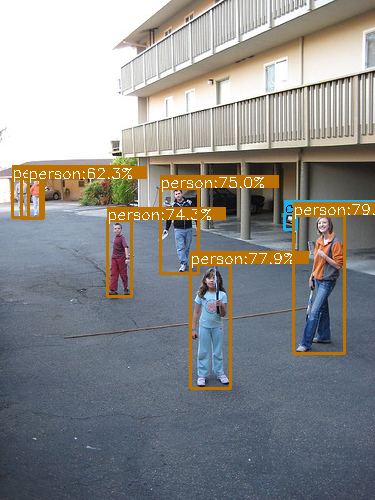

In [14]:
imshow_scale = 1.0
cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))

In [36]:
import numpy as np

In [37]:
# Video input location
video_path = r"C:\Users\mewri\OneDrive\Documents\ENEE408N\People_walking_in_airport.mov"
cap = cv2.VideoCapture(video_path)
# Video details
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Using each frame of the captured video, run loop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    # Resize frame to match model input size (416x416 assumed)
    input_img = cv2.resize(frame, (416, 416))
    input_img = input_img.transpose(2, 0, 1)  # HWC → CHW
    input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
    input_img = input_img.astype(np.float32) / 255.0  # Normalize

    # Run inference
    meta, res = predictor.inference(input_img)
    result = overlay_bbox_cv(meta['raw_img'][0], res[0], cfg.class_names, score_thresh=0.35)
    # print("Detection output:", res.shape)
    # print("First detection details:", results[0][0])


    # Process detections (modify based on NanoDet output format)
    '''
    for detection in res[0]:  # Loop through detections
        
        x1, y1, x2, y2 = detection[:4]  # Get bounding box
        score = detection[4]  # Confidence score
        class_id = detection[-1]  # Class ID
        if score > 0.1:  # Confidence threshold
            x1, y1, x2, y2 = int(x1 * frame_width), int(y1 * frame_height), int(x2 * frame_width), int(y2 * frame_height)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"Class {int(class_id)}: {score:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)'
    '''

    imshow_scale = 1.0
    cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))
    # Show frame with detections
    # cv2.imshow("Object Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:695: error: (-215:Assertion failed) !ssize.empty() in function 'cv::remapBilinear'


In [19]:
# Dummy input for ONNX export (batch size 1, 3 channels, 416x416)
dummy_input = torch.randn(1, 3, 416, 416)

# Export to ONNX
onnx_path = "nanodet.onnx"
torch.onnx.export(model, dummy_input, onnx_path,
                  export_params=True,
                  opset_version=11,
                  input_names=['input'],
                  output_names=['output'],
                  dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})

print(f"Model exported to {onnx_path}")


Model exported to nanodet.onnx


In [21]:
from openvino.tools.mo import convert_model
import openvino.runtime as ov

# Convert ONNX model to OpenVINO IR
ov_model = convert_model("nanodet.onnx", compress_to_fp16=True)

# Save the converted model
ov.serialize(ov_model, "openvino_model.xml", "openvino_model.bin")

print("Model successfully converted to OpenVINO IR format.")



[ INFO ] MO command line tool is considered as the legacy conversion API as of OpenVINO 2023.2 release.
In 2025.0 MO command line tool and openvino.tools.mo.convert_model() will be removed. Please use OpenVINO Model Converter (OVC) or openvino.convert_model(). OVC represents a lightweight alternative of MO and provides simplified model conversion API. 
Find more information about transition from MO to OVC at https://docs.openvino.ai/2023.2/openvino_docs_OV_Converter_UG_prepare_model_convert_model_MO_OVC_transition.html
Model successfully converted to OpenVINO IR format.


In [22]:
import openvino.runtime as ov
import numpy as np

# Load OpenVINO model
core = ov.Core()
model = core.read_model("openvino_model.xml")
compiled_model = core.compile_model(model, "CPU")

# Prepare input
input_tensor = np.random.randn(1, 3, 416, 416).astype(np.float32)
output = compiled_model([input_tensor])

print("Inference output:", output)


Inference output: {<ConstOutput: names[output] shape[?,1000] type: f32>: array([[ 1.01214957e+00,  2.96011567e+00,  3.15044951e+00,
         3.45398426e+00,  4.61291313e+00,  3.02123237e+00,
         3.88512540e+00,  2.15010792e-01, -1.15637589e+00,
        -4.17366445e-01,  5.69852054e-01,  2.60943937e+00,
         1.46129131e+00,  2.87613750e+00,  2.88297510e+00,
         1.66393018e+00,  5.42896509e-01,  8.12301338e-01,
         2.18922353e+00,  1.46923006e+00,  1.10921490e+00,
         9.54061031e-01,  2.49044085e+00,  1.83316612e+00,
         6.35786474e-01,  1.14740849e+00,  2.06345177e+00,
         1.57783794e+00,  9.94644523e-01,  1.64280248e+00,
         1.44630301e+00,  1.03346360e+00, -4.40528810e-01,
         2.01497412e+00,  2.66005182e+00,  1.02679682e+00,
         6.66345358e-01,  2.77592570e-01,  1.05061293e+00,
         2.16489482e+00,  2.61441016e+00,  1.34583557e+00,
         1.71243179e+00,  3.03440541e-01,  2.50584841e+00,
         6.40598953e-01,  2.76013851e+00, 

In [ ]:
import openvino.runtime as ov
import numpy as np

# Load model
core = ov.Core()
model = core.read_model("openvino_model.xml")
compiled_model = core.compile_model(model, "CPU")

# Prepare input
input_tensor = np.random.randn(1, 3, 224, 224).astype(np.float32)
output = compiled_model([input_tensor])

# Get output
print(output)


In [23]:
import cv2
import numpy as np
import openvino.runtime as ov

# Path to your image
image_path = r"C:\Users\mewri\OneDrive\Documents\ENEE408N\COCO_train2014_000000196639.jpg"

# Load image
image = cv2.imread(image_path)

# Resize to match NanoDet's input size (416x416)
image_resized = cv2.resize(image, (416, 416))

# Convert BGR to RGB (if necessary, since OpenVINO usually expects RGB)
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (scale pixel values to [0,1])
image_normalized = image_rgb.astype(np.float32) / 255.0

# Change shape from (H, W, C) to (C, H, W) and add batch dimension
input_tensor = np.transpose(image_normalized, (2, 0, 1))  # (3, 416, 416)
input_tensor = np.expand_dims(input_tensor, axis=0)  # (1, 3, 416, 416)


In [24]:
# Load OpenVINO model
core = ov.Core()
model = core.read_model("openvino_model.xml")
compiled_model = core.compile_model(model, "CPU")  # Use "GPU" if available

# Perform inference
output = compiled_model([input_tensor])

# Extract results
print("Inference Output:", output)


Inference Output: {<ConstOutput: names[output] shape[?,1000] type: f32>: array([[-1.56487417e+00, -1.14479220e+00,  7.15732336e-01,
         3.96771759e-01,  1.66214681e+00, -1.75827757e-01,
         1.05468547e+00,  1.93235636e-01, -9.87136364e-01,
        -2.11523473e-01, -1.98814046e+00, -1.71250677e+00,
        -1.19863141e+00, -1.06793374e-01, -2.09737325e+00,
        -1.47616196e+00, -1.27346504e+00, -9.28348958e-01,
        -1.21363139e+00, -1.62623298e+00, -1.45333028e+00,
        -2.43128091e-03, -6.43118978e-01,  2.10303858e-01,
        -1.56742108e+00, -1.63086236e+00, -1.78052402e+00,
        -2.29954219e+00, -1.90363133e+00, -2.45230579e+00,
        -1.83079994e+00, -1.87138736e+00, -2.17826033e+00,
        -6.22777343e-02,  8.48436773e-01, -2.36122179e+00,
        -1.45625496e+00, -1.75730515e+00, -4.94718552e-01,
         8.56679678e-02, -8.24358523e-01, -3.54766011e-01,
        -1.21080339e+00, -1.53971064e+00, -4.58359033e-01,
         6.03959337e-02, -3.51342499e-01, 

In [35]:
import cv2
import numpy as np
import openvino.runtime as ov
from nanodet.util import overlay_bbox_cv
from PIL import Image
from IPython.display import display

# Load image
image_path = r"C:\Users\mewri\OneDrive\Documents\ENEE408N\COCO_train2014_000000196639.jpg"
image = cv2.imread(image_path)
original_image = image.copy()

# Preprocess image
image_resized = cv2.resize(image, (416, 416))
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
image_normalized = image_rgb.astype(np.float32) / 255.0
input_tensor = np.transpose(image_normalized, (2, 0, 1))  # (3, 416, 416)
input_tensor = np.expand_dims(input_tensor, axis=0)  # (1, 3, 416, 416)

# Load OpenVINO model
core = ov.Core()
model = core.read_model("openvino_model.xml")
compiled_model = core.compile_model(model, "CPU")

# Perform inference
output = compiled_model([input_tensor])

# Debug output shape
print("Output type:", type(output[0]))
print("Output shape:", output[0].shape)
print("First 10 output values:", output[0][:10])

# Reshape output if it matches expected detection format
num_values_per_detection = 6
if output[0].size % num_values_per_detection == 0:
    num_detections = output[0].size // num_values_per_detection
    detections = output[0].reshape(num_detections, num_values_per_detection)
else:
    print("Unexpected output size:", output[0].size)
    detections = output[0]  # Keep raw output for debugging

# Filter detections with confidence score > 0.35
score_thresh = 0.35
valid_detections = detections[detections[:, 4] > score_thresh]

# Rescale bounding boxes to original image size
height, width = original_image.shape[:2]
scale_x, scale_y = width / 416, height / 416
valid_detections[:, [0, 2]] *= scale_x  # x_min, x_max
valid_detections[:, [1, 3]] *= scale_y  # y_min, y_max

# Draw bounding boxes on original image
class_names = cfg.class_names
result_img = overlay_bbox_cv(original_image, valid_detections, class_names, score_thresh=0.35)

# Display result
def cv2_imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(image))

cv2_imshow(result_img)


Output type: <class 'numpy.ndarray'>
Output shape: (1, 1000)
First 10 output values: [[-1.56487417e+00 -1.14479220e+00  7.15732336e-01  3.96771759e-01
   1.66214681e+00 -1.75827757e-01  1.05468547e+00  1.93235636e-01
  -9.87136364e-01 -2.11523473e-01 -1.98814046e+00 -1.71250677e+00
  -1.19863141e+00 -1.06793374e-01 -2.09737325e+00 -1.47616196e+00
  -1.27346504e+00 -9.28348958e-01 -1.21363139e+00 -1.62623298e+00
  -1.45333028e+00 -2.43128091e-03 -6.43118978e-01  2.10303858e-01
  -1.56742108e+00 -1.63086236e+00 -1.78052402e+00 -2.29954219e+00
  -1.90363133e+00 -2.45230579e+00 -1.83079994e+00 -1.87138736e+00
  -2.17826033e+00 -6.22777343e-02  8.48436773e-01 -2.36122179e+00
  -1.45625496e+00 -1.75730515e+00 -4.94718552e-01  8.56679678e-02
  -8.24358523e-01 -3.54766011e-01 -1.21080339e+00 -1.53971064e+00
  -4.58359033e-01  6.03959337e-02 -3.51342499e-01 -1.16691029e+00
   1.06089320e-02  1.93314463e-01  7.72427738e-01 -5.74269950e-01
   1.23648763e-01 -5.53209007e-01  8.37172925e-01 -9.3737

IndexError: arrays used as indices must be of integer (or boolean) type